# Data Science amb Python


## Sprint 9 : Correlation, Feature Scaling & Feature Engineering


#### Cristiane de Souza da Silva

May 2021

### Exercise 1

Grab a sports-themed dataset that you like and normalize categorical attributes in dummy. Normalize numeric attributes with StandardScaler.

In [1]:
#import libraries

import numpy as np, pandas as pd, matplotlib.pylab as plt, seaborn as sns

In [2]:
df_sport = pd.read_csv('athlete_olympics.csv')
df_sport.head()

,ID,Sex,Age,Height,Weight,NOC,Season,Medal
0,1,M,24.0,180.0,80.0,CHN,Summer,NaN
1,2,M,23.0,170.0,60.0,CHN,Summer,NaN
2,3,M,24.0,NaN,NaN,DEN,Summer,NaN
3,4,M,34.0,NaN,NaN,DEN,Summer,Gold
4,5,F,21.0,185.0,82.0,NED,Winter,NaN


In [3]:
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   NOC     271116 non-null  object 
 6   Season  271116 non-null  object 
 7   Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 16.5+ MB


In [4]:
# Evaluating for Missing Data
missing_data = df_sport.isnull()
missing_data.head(5)

,ID,Sex,Age,Height,Weight,NOC,Season,Medal
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True
2,False,False,False,True,True,False,False,True
3,False,False,False,True,True,False,False,False
4,False,False,False,False,False,False,False,True


In [5]:
#counting for missing data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

ID
False    271116
Name: ID, dtype: int64

Sex
False    271116
Name: Sex, dtype: int64

Age
False    261642
True       9474
Name: Age, dtype: int64

Height
False    210945
True      60171
Name: Height, dtype: int64

Weight
False    208241
True      62875
Name: Weight, dtype: int64

NOC
False    271116
Name: NOC, dtype: int64

Season
False    271116
Name: Season, dtype: int64

Medal
True     231333
False     39783
Name: Medal, dtype: int64



#### Deal with missing data

* The missing data in  'Age', 'Height', and 'Weight' columns will be replaced by their mean.

* The missing data in  'Medal' column will be replaced number 0. 


In [6]:
# Replace the Age, Height and Weight NaN by their median.

df_sport['Age'].fillna(df_sport['Age'].median(), inplace=True)

df_sport['Height'].fillna(df_sport['Height'].median(), inplace=True)

df_sport['Weight'].fillna(df_sport['Weight'].median(), inplace=True)

In [7]:
#Replace 'NaN' in Medal column with N0_Medal

df_sport['Medal'] = df_sport['Medal'].fillna('No_Medal')

df_sport.head()

,ID,Sex,Age,Height,Weight,NOC,Season,Medal
0,1,M,24.0,180.0,80.0,CHN,Summer,No_Medal
1,2,M,23.0,170.0,60.0,CHN,Summer,No_Medal
2,3,M,24.0,175.0,70.0,DEN,Summer,No_Medal
3,4,M,34.0,175.0,70.0,DEN,Summer,Gold
4,5,F,21.0,185.0,82.0,NED,Winter,No_Medal


In [8]:
print('Unique values of Sex are: ', df_sport['Sex'].nunique(), '\n')
print('Unique values of Season are: ', df_sport['Season'].nunique(), '\n')
print('Unique values of NOC are: ', df_sport['NOC'].nunique(), '\n')
print('Unique values of Medal are: ', df_sport['Medal'].nunique())

Unique values of Sex are:  2 

Unique values of Season are:  2 

Unique values of NOC are:  230 

Unique values of Medal are:  4


#### Normalize categorical attributes in dummy.

The column "Sex" has two unique values ( M or F), as well Season ( Summer or Winter). 
There are many unique values in NOC and the Medal column has four inique values
I convert "Sex",  "Season" and "Medal" into indicator variables.

In [9]:
dummy_variable_1 = pd.get_dummies(df_sport["Sex"])
dummy_variable_1.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [10]:
dummy_variable_2 = pd.get_dummies(df_sport["Season"])
dummy_variable_2.head()

,Summer,Winter
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [11]:
dummy_variable_3 = pd.get_dummies(df_sport["Medal"])
dummy_variable_3.head()

,Bronze,Gold,No_Medal,Silver
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [12]:
# merge data frame "df" and "dummy_variable_1" 

df_dummy = df_sport.copy()
df_dummy = pd.concat([df_dummy, dummy_variable_1, dummy_variable_2, dummy_variable_3 ], axis=1)


In [13]:
# Set ID column as index

df_dummy.set_index('ID', inplace=True)

In [14]:
# drop original columns "Sex", "Season", and "Medal" from "df_dummy"
df_dummy.drop(["Sex", "Season", "Medal", "NOC"], axis = 1, inplace=True)

In [15]:
df_dummy.head()

,Age,Height,Weight,F,M,Summer,Winter,Bronze,Gold,No_Medal,Silver
ID,,,,,,,,,,,
1,24.0,180.0,80.0,0,1,1,0,0,0,1,0
2,23.0,170.0,60.0,0,1,1,0,0,0,1,0
3,24.0,175.0,70.0,0,1,1,0,0,0,1,0
4,34.0,175.0,70.0,0,1,1,0,0,1,0,0
5,21.0,185.0,82.0,1,0,0,1,0,0,1,0


#### Normalize numeric attributes with StandardScaler.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

print(scaler.fit(df_dummy))

StandardScaler()


In [18]:
print(scaler.mean_)

[2.55024934e+01 1.75263740e+02 7.05394997e+01 2.74871273e-01
 7.25128727e-01 8.20873722e-01 1.79126278e-01 4.90380501e-02
 4.93220614e-02 8.53262072e-01 4.83778161e-02]


### Exercise 2

Continue with the sports theme dataset you like and apply the Principal Component Analysis (PCA).

In [19]:
from sklearn.decomposition import PCA
df_dummy.shape

(271116, 11)

In [21]:
pca = PCA(n_components=11)
principal_components = pca.fit_transform(df_dummy)
principal_df = pd.DataFrame(data = principal_components, columns = ['pc_1', 'pc_2', 'pc_3', 
                                                                    'pc_4', 'pc_5', 'pc_6','pc_7', 
                                                                    'pc_8', 'pc_9', 'pc_10', 'pc_11'])
principal_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11
0,10.347542,-2.087541,1.690286,-0.320550,0.101085,-0.187643,-0.000670,0.000408,-2.167623e-14,1.302348e-15,2.333665e-16
1,-11.820328,-1.797025,-1.360767,-0.683409,-0.128362,-0.098957,0.002051,0.000067,-2.108161e-15,1.095399e-16,3.606493e-17
2,-0.698556,-1.447969,0.100028,-0.496547,-0.012337,-0.144164,0.000688,0.000180,1.172430e-15,-7.695382e-17,-1.075319e-17
3,0.060867,8.439004,-1.195831,-0.335009,0.141092,0.987906,0.757249,-0.296775,3.937924e-15,1.877281e-14,-4.002144e-15
4,14.543699,-5.795786,-0.841925,1.685174,-0.350136,-0.238126,-0.004092,-0.000425,6.835930e-16,-2.192115e-16,-1.330658e-16
...,...,...,...,...,...,...,...,...,...,...,...
271111,17.582007,3.099978,6.960963,0.542258,-1.004817,-0.119234,-0.001040,-0.000656,1.955556e-17,3.055540e-17,1.224973e-17
271112,-8.976967,1.244770,-7.319863,0.178222,-1.313067,-0.021342,0.000400,-0.001132,-1.371899e-17,-7.445163e-17,-1.339296e-17
271113,-8.976967,1.244770,-7.319863,0.178222,-1.313067,-0.021342,0.000400,-0.001132,-1.371899e-17,-7.445163e-17,-1.339296e-17
271114,26.792172,3.266600,5.909477,0.715006,-0.915064,-0.158897,-0.002546,-0.000616,-2.226036e-17,-1.384030e-17,-1.064325e-17


In [24]:
final_df = pd.concat([principal_df, df_sport[['Medal']]], axis=1)
final_df.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,Medal
0,10.347542,-2.087541,1.690286,-0.320550,0.101085,-0.187643,-0.000670,0.000408,-2.167623e-14,1.302348e-15,2.333665e-16,No_Medal
1,-11.820328,-1.797025,-1.360767,-0.683409,-0.128362,-0.098957,0.002051,0.000067,-2.108161e-15,1.095399e-16,3.606493e-17,No_Medal
2,-0.698556,-1.447969,0.100028,-0.496547,-0.012337,-0.144164,0.000688,0.000180,1.172430e-15,-7.695382e-17,-1.075319e-17,No_Medal
3,0.060867,8.439004,-1.195831,-0.335009,0.141092,0.987906,0.757249,-0.296775,3.937924e-15,1.877281e-14,-4.002144e-15,Gold
4,14.543699,-5.795786,-0.841925,1.685174,-0.350136,-0.238126,-0.004092,-0.000425,6.835930e-16,-2.192115e-16,-1.330658e-16,No_Medal


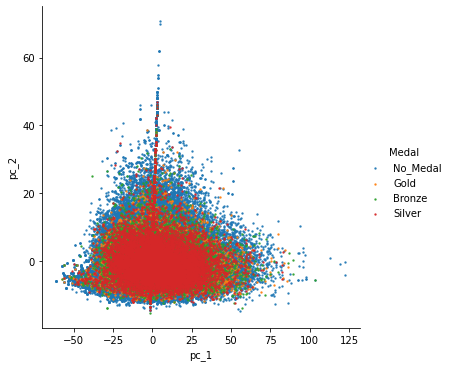

In [30]:
# Plot
sns.lmplot( x="pc_1", y="pc_2",
  data=final_df, 
  fit_reg=False, 
  hue='Medal', # color by cluster
  legend=True,
  scatter_kws={"s": 2}); # specify the point size



There is no clearly separation between the medals.

### Exercise 3

Continue with the sports theme data set you like and normalize the data taking into account the outliers.

In [31]:
df_dummy.headd

,Age,Height,Weight,F,M,Summer,Winter,Bronze,Gold,No_Medal,Silver
ID,,,,,,,,,,,
1,24.0,180.0,80.0,0,1,1,0,0,0,1,0
2,23.0,170.0,60.0,0,1,1,0,0,0,1,0
3,24.0,175.0,70.0,0,1,1,0,0,0,1,0
4,34.0,175.0,70.0,0,1,1,0,0,1,0,0
5,21.0,185.0,82.0,1,0,0,1,0,0,1,0


In [32]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_dummy)


In [33]:
transformer

RobustScaler()

In [34]:
transformer.transform(df_dummy)

array([[ 0.        ,  0.5       ,  0.83333333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16666667, -0.5       , -0.83333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5       ,  0.1       , -0.91666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  2.16666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.66666667,  1.        ,  2.16666667, ...,  0.        ,
         0.        ,  0.        ]])